(a)

Let us define the loss for a single training example: $J^{(i)}(\theta) = -[y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1-h_\theta(x^{(i)}))]$, so that 
$$J(\theta) = \frac{1}{m}\sum_{i=1}^m J^{(i)}(\theta)$$

To simplify the notation, will will omit the superscript $(i)$ in the expression of $J^{(i)}(\theta)$.

$$\frac{\partial J^{(i)} (\theta)}{\partial \theta_j} = -(\frac{y}{h_\theta(x)} - \frac{1-y}{1-h_\theta(x)})g'(\theta^T x) x_j = -(y-g(\theta^Tx))x_j$$

$$\frac{\partial^2 J^{(i)} (\theta)}{\partial \theta_j \partial \theta_k} = g(\theta^T x)(1-g(\theta^T x))x_j x_k$$

Therefore, for a single training exmaple, the Hessian:

$$H^{(i)} = g(\theta^T x)(1-g(\theta^T x)) x x^T$$

So:

$$H = \frac{1}{m}  \sum_{i=1}^m g(\theta^T x^{(i)})(1-g(\theta^T x^{(i)})) x^{(i)} x^{(i)T}$$

(It turns out (I am not sure how to come up with this. I referred to the solution) $H$ can be written is a compact matrix form:

$$H = \frac{1}{m} X^T \cdot g(X\theta) \cdot (1-g(X\theta)) X$$

where $X$ is a $m$ by $n$ matrix, and $\cdot$ should be interpreted in a broadcasting sense in Numpy.)

Then we have
$$
\begin{align}
z^T H z 
&= \frac{1}{m} \sum_{i=1}^m g(\theta^T x^{(i)})(1-g(\theta^T x^{(i)})) z^Tx^{(i)} x^{(i)T}z 
\\
&= \frac{1}{m} \sum_{i=1}^m g(\theta^T x^{(i)})(1-g(\theta^T x^{(i)})) (x^{(i)T}z)^T x^{(i)T}z
\\
&= \frac{1}{m} \sum_{i=1}^m g(\theta^T x^{(i)})(1-g(\theta^T x^{(i)})) (x^{(i)T}z)^2
\\
& \geq 0
\end{align}
$$

(b)

Let's first load the data and visualize it

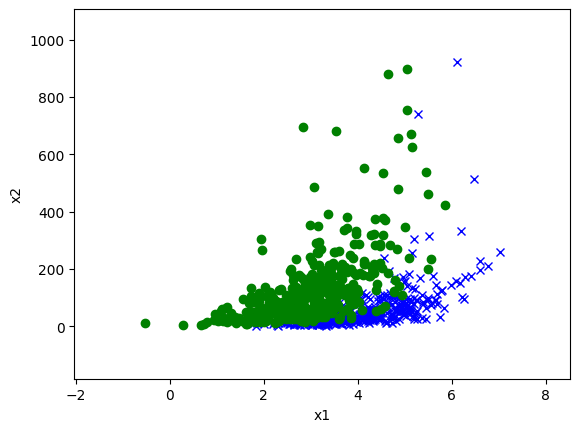

In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import numpy as np
import util

train_path='../data/ds1_train.csv'
eval_path='../data/ds1_valid.csv'
pred_path='../output/ds1_pred_logistic_regression.csv'

x_train, y_train = util.load_dataset(train_path, add_intercept=True)
util.plot(x_train, y_train)

We want to use Newton's method to find $\theta$ where $J(\theta)$ is minimized, or $J'(\theta) = 0$. The update rule for Newton's method is:

$$\theta := \theta - H^{-1} \nabla_\theta J(\theta)$$

Use the result from (1) we have

$$
\begin{align}
\nabla J(\theta) &= -\frac{1}{m}\sum_{i=1}^m (y^{(i)}-g(\theta^Tx^{(i)}))x^{(i)}
\\
&= \frac{1}{m}X^T (g(X\theta) - Y)
\end{align}
$$

where $X$ is a $m$ by $n$ matrix.

Also from (1) we have

$$H = \frac{1}{m} X^T \cdot g(X\theta) \cdot (1-g(X\theta)) X$$

The accuracy of the logistic regression model is: 87.0 %


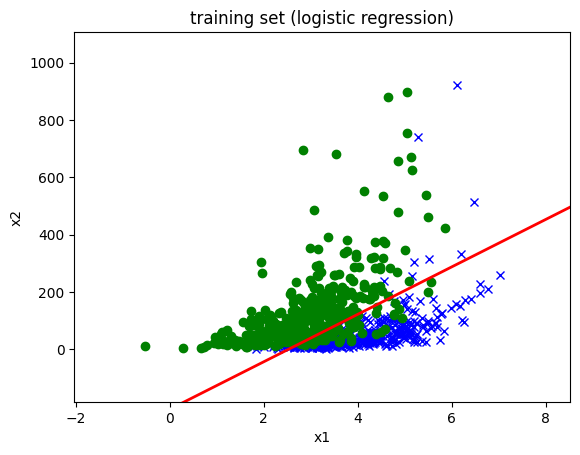

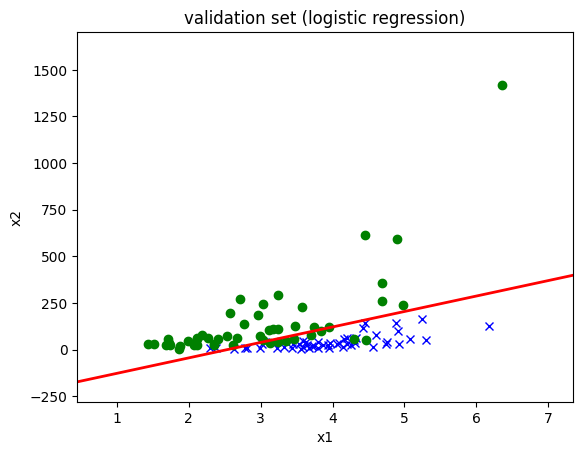

In [2]:
from p01b_logreg import main as p01b

p01b(train_path, eval_path, pred_path)

(c)

According to Bayes rule, we have

$$p(x,y=1) = p(x|y=1)p(y=1) = p(y=1|x)p(x)$$

So

$$
\begin{align}
p(y=1|x) &= \frac{p(x|y=1)p(y=1)}{p(x)} 
\\
&= \frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1) + p(x|y=0)p(y=0)}
\\
&= \frac{1}{1 + \frac{p(x|y=0)p(y=0)}{p(x|y=1)p(y=1)}}
\\
&= \frac{1}{1 + \frac{1-\phi}{\phi} \exp (-\frac{1}{2}[(x-\mu_0)^T \Sigma^{-1}(x-\mu_0)-(x-\mu_1)^T \Sigma^{-1}(x-\mu_1)])}
\\
&= \frac{1}{1 + \frac{1-\phi}{\phi} \exp (-\frac{1}{2}[(\mu_1^T - \mu_0^T)\Sigma^{-1}x + x^T \Sigma^{-1} (\mu_1 - \mu_0) + \mu_0^T \Sigma^{-1} \mu_0 - \mu_1^T \Sigma^{-1} \mu_1])}
\end{align}
$$

Notice that $x^T \Sigma^{-1} (\mu_1 - \mu_0)$ is just a number, so

$$x^T \Sigma^{-1} (\mu_1 - \mu_0) = (x^T \Sigma^{-1} (\mu_1 - \mu_0))^T = (\mu_1^T - \mu_0^T) (\Sigma^{-1})^T x = (\mu_1^T - \mu_0^T) (\Sigma^T)^{-1} x = (\mu_1^T - \mu_0^T) \Sigma^{-1} x$$

where we used $\Sigma^T = \Sigma$ because it is a covariance matrix.

So

$$
\begin{align}
p(y=1|x) &= \frac{1}{1 + \frac{1-\phi}{\phi} \exp (-[(\mu_1^T - \mu_0^T)\Sigma^{-1}x + \frac{1}{2}(\mu_0^T \Sigma^{-1} \mu_0 - \mu_1^T \Sigma^{-1} \mu_1)])} 
\\
&= \frac{1}{1 + \exp (-[(\mu_1^T - \mu_0^T)\Sigma^{-1}x + \frac{1}{2}(\mu_0^T \Sigma^{-1} \mu_0 - \mu_1^T \Sigma^{-1} \mu_1) + \ln \frac{\phi}{1-\phi}])}
\\
&=\frac{1}{1+\exp(-(\theta^T x+\theta_0))}
\end{align}
$$

where 

$$\theta= \Sigma^{-1} (\mu_1 - \mu_0)$$ and 

$$\theta_0 = \frac{1}{2}(\mu_0^T \Sigma^{-1} \mu_0 - \mu_1^T \Sigma^{-1} \mu_1) + \ln \frac{\phi}{1-\phi}$$

(d)

$$l(\phi, \mu_0, \mu_1, \Sigma) = \sum_{i=1}^m ( \log p(x^{(i)}|y^{(i)};\mu_0, \mu_1, \Sigma) + \log p(y^{(i)};\phi))$$

To be finished...

(e) GDA

The accuracy of the GDA model is: 83.0 %


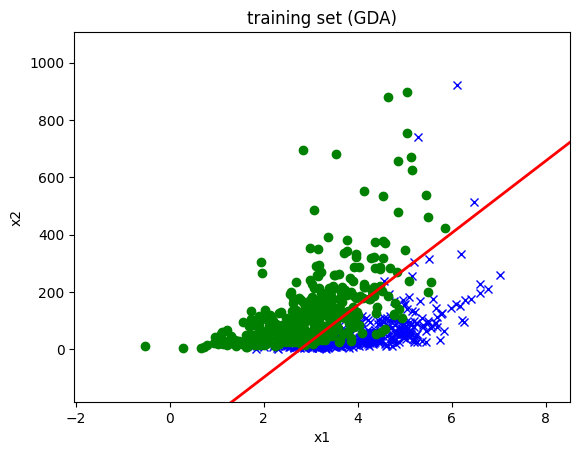

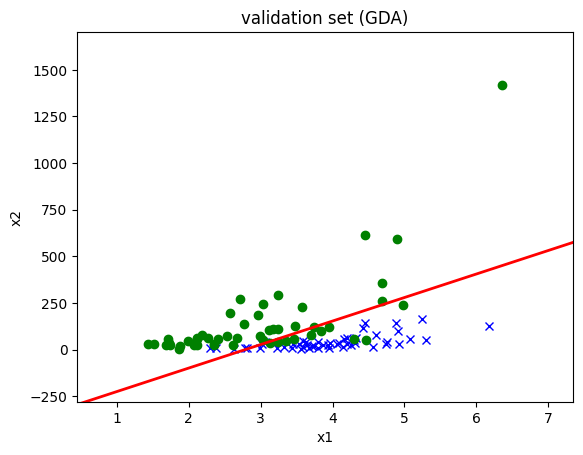

In [3]:
from p01e_gda import main

train_path='../data/ds1_train.csv'
eval_path='../data/ds1_valid.csv'
pred_path='../output/ds1_pred_gda.csv'

main(train_path, eval_path, pred_path)

(f) 

Done above.

(g) 

For Dataset 2, we will use logistic regression and GDA respectively.

The accuracy of the logistic regression model is: 90.0 %


NameError: name 'p01e' is not defined

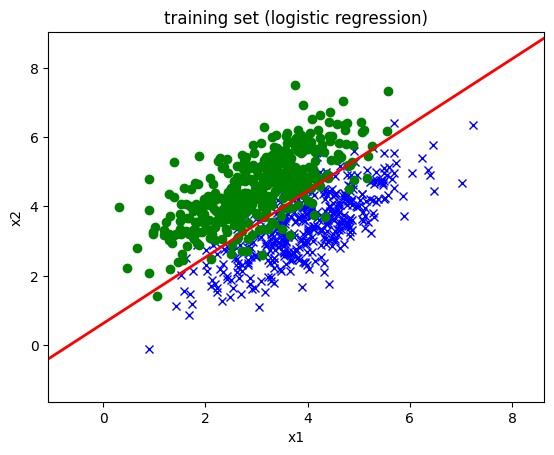

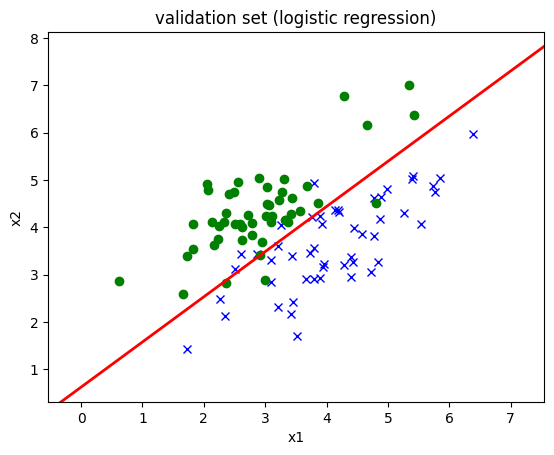

In [4]:
train_path='../data/ds2_train.csv'
eval_path='../data/ds2_valid.csv'
p01b(train_path, eval_path, pred_path='../output/ds2_pred_logistic_regression.csv')
p01e(train_path, eval_path, pred_path='../output/ds2_pred_gda.csv')

(g)

On dataset 1, GDA seem to perform worse than logistic regression. This is because the data from dataset 1 is clearly non-Gaussian, which violates the assumption of GDA.